 ## JUI ROY 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [2]:
data=pd.read_csv("Salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


   ## X= YEARS OF EXPERIENCE
  ## Y= SALARY

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Dividing dependent and independent variabels 

In [5]:
x=data[['YearsExperience']]
y=data[['Salary']]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


## convert X and y to array

In [7]:
x=np.array(x)
type(x)

numpy.ndarray

In [8]:
x.shape

(30, 1)

In [9]:
y=np.array(y)
type(y)

numpy.ndarray

In [10]:
y.shape

(30, 1)

## splitting  the data train and test set

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x,y,train_size=0.33,random_state=10)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9, 1), (21, 1), (9, 1), (21, 1))

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

## train  your model

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)

In [16]:
y_pred

array([[ 87734.71294054],
       [ 55682.39817057],
       [ 53011.37193974],
       [ 40546.58286252],
       [ 44998.29324724],
       [ 90405.73917137],
       [ 63695.47686306],
       [112664.29109497],
       [ 62805.13478612],
       [ 38765.89870864],
       [ 80611.97632499],
       [ 67256.84517084],
       [ 79721.63424805],
       [ 53901.71401668],
       [ 62805.13478612],
       [100199.50201776],
       [104651.21240248],
       [118896.68563358],
       [ 97528.47578692],
       [ 61914.79270917],
       [111773.94901803]])

In [17]:
y_pred=np.round(y_pred,2)

In [18]:
y_test

array([[ 91738.],
       [ 54445.],
       [ 56642.],
       [ 37731.],
       [ 43525.],
       [ 98273.],
       [ 57081.],
       [112635.],
       [ 56957.],
       [ 46205.],
       [ 93940.],
       [ 61111.],
       [ 81363.],
       [ 60150.],
       [ 55794.],
       [113812.],
       [109431.],
       [122391.],
       [101302.],
       [ 63218.],
       [116969.]])

## Checking model accurecy

In [19]:
from sklearn.metrics import mean_squared_error
errors= mean_squared_error(y_pred,y_test)
errors

38362176.97230952

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
score*100

94.76697704009871

## draw the line of regressions( training set)

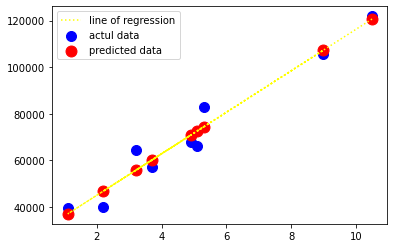

In [21]:
plt.scatter(x_train,y_train,color="blue",label="actul data",s=100)
plt.scatter(x_train,model.predict(x_train),color="red", label='predicted data',s=120)
plt.plot(x_train,model.predict(x_train),color="yellow", label='line of regression',linestyle='dotted')
plt.legend()
plt.show()

## draw the line of test data set

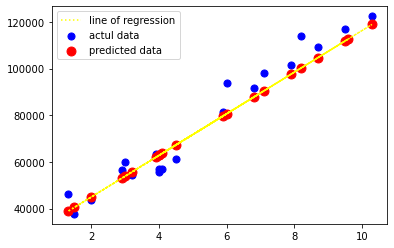

In [22]:
plt.scatter(x_test,y_test,color="blue",label="actul data",s=50)
plt.scatter(x_test,y_pred,color="red", label='predicted data',s=80)
plt.plot(x_test,y_pred,color="yellow", label='line of regression',linestyle='dotted')
plt.legend()
plt.show()

In [23]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean squared error = 38362176.97
Explain variance score = 0.95
R2 score = 0.95


In [26]:
accuracy=[]
for i in range(1):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,train_size=0.8,random_state=i)
    model1=LinearRegression()
    model1.fit(x_train1,y_train1)
    y_pred1=model1.predict(x_test1)
    score1=r2_score(y_test1,y_pred1)
    accuracy.append(score1)
    print(np.max(accuracy))
    print(np.argmax(accuracy))

0.988169515729126
0
